# Installing necessary dependencies

In [1]:
#pip install Pillow

In [59]:
# load and display an image with Matplotlib
from matplotlib import pyplot
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
from skimage.feature import hog
from skimage import data, exposure
from PIL import Image
import xml.etree.ElementTree as et

# Python Code using Pillow librarie

#### ***XML file's conversion to one CSV***

In [60]:

datafd=[]
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = et.parse(xml_file)
        root = tree.getroot()
        value = (int(root.find('ObservationId').text),
                 int(root.find('MediaId').text),
                 float(root.find('Vote').text),
                 root.find('Content').text,
                 int(root.find('ClassId').text),
                 root.find('Family').text,
                 root.find('Genus').text,
                 root.find('Species').text,
                 root.find('Location').text,
                 root.find('Date').text
                 )
        xml_list.append(value)
    column_name = ['ObservationId', 'MediaId', 'Vote', 'Content', 'ClassId', 'Family', 'Genus', 'Species','Location','Date']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    image_path = os.path.join(os.getcwd(), 'D:/small_dataset_train/train1')
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('flowers.csv', index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


In [61]:
temp = pd.read_csv('flowers.csv')
df = temp.sort_values(['MediaId'], ascending=True)
temp.head()

,ObservationId,MediaId,Vote,Content,ClassId,Family,Genus,Species,Location,Date
0,15010,100019,3.0,Flower,8527,Asteraceae,Achillea,Achillea millefolium L.,Aucamville,2009-4-24
1,10732,100056,4.0,Flower,4516,Ranunculaceae,Ficaria,Ficaria verna Huds.,Biot,2014-9-7
2,24005,100087,4.0,Flower,588,Asteraceae,Centaurea,Centaurea jacea L.,NaN,1800-1-1
3,19892,100182,4.0,Flower,9930,Orchidaceae,Epipactis,Epipactis helleborine (L.) Crantz,NaN,1800-1-1
4,36220,10019,4.0,Flower,6487,Orchidaceae,Ophrys,Ophrys apifera Huds.,Saffré,2010-6-26


In [62]:
df.head()

,ObservationId,MediaId,Vote,Content,ClassId,Family,Genus,Species,Location,Date
870,3087,23,2.0,Flower,5148,Salicaceae,Salix,Salix caprea L.,Champ-sur-Drac,2006-3-10
528,664,133,4.0,Flower,576,Asteraceae,Cyanus,Cyanus segetum Hill,Paris,2013-6-28
688,33480,177,3.0,Flower,30471,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Lauret,2009-5-20
735,4130,194,4.0,Flower,1047,Asteraceae,Leucanthemum,Leucanthemum vulgare Lam.,NaN,2013-6-27
1051,5260,281,4.0,Flower,8600,Orchidaceae,Anacamptis,Anacamptis pyramidalis (L.) Rich.,La Tour-sur-Orb,2013-5-21


In [78]:
# load all images in a directory

def loadImages():
    image_files = sorted([os.path.join('D:/small_dataset_train/train1', file)
         for file in os.listdir('D:/small_dataset_train/train1') if      file.endswith('.jpg')])
    return image_files


In [84]:
def reloadImages():
    i =[]
    image_files = sorted([os.path.join('D:/small_dataset_train/train1', file)
         for file in os.listdir('D:/small_dataset_train/train1') if      file.endswith('.png')])
    for image in sorted(image_files):
        i.append(Image.open(image))
    return i

In [85]:
def processing(dataI):
    for i in dataI:
        img = Image.open(i)      
        temp= i.split('.')
        new_image = img.resize((220, 220))    
        greyscale_image = new_image.convert('L')
       # croppedIm = greyscale_image.crop((290, 250, 650, 650)) 
        name = str(temp[0])+'.png'       
       # croppedIm.save(name)
        greyscale_image.save(name)
       
    


In [86]:
def Histogram_Oriented_Gradients(images_list):
    listfig, listfd =[], []
    for image in images_list:
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=False)

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        listfig.append(hog_image_rescaled)
        listfd.append(fd)
        

    return listfig, listfd

In [87]:
def show_image(origin , y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(origin , cmap=plt.cm.gray)
    ax1.set_title('Input image')
   
    ax2.axis('off')
    ax2.imshow(y, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

List of files the first 10 in the folder:
 ['D:/small_dataset_train/train1\\100019.jpg', 'D:/small_dataset_train/train1\\100056.jpg', 'D:/small_dataset_train/train1\\100087.jpg', 'D:/small_dataset_train/train1\\100182.jpg', 'D:/small_dataset_train/train1\\10019.jpg', 'D:/small_dataset_train/train1\\100211.jpg', 'D:/small_dataset_train/train1\\100250.jpg', 'D:/small_dataset_train/train1\\100280.jpg', 'D:/small_dataset_train/train1\\100310.jpg', 'D:/small_dataset_train/train1\\100366.jpg']
--------------------------------


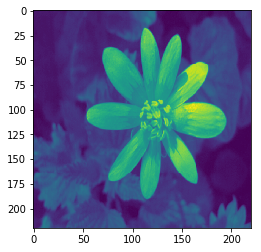

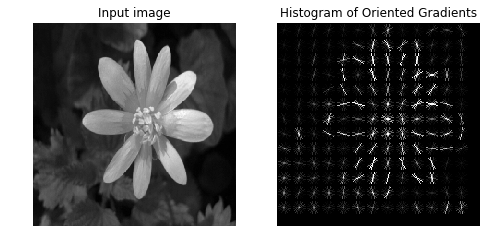

,MediaId,Species,filename,vectore
0,9948,Himantoglossum hircinum (L.) Spreng.,9948.png,"[0.15730915470683554, 0.08809583440689178, 0.1..."
1,99490,Glaucium flavum Crantz,99490.png,"[0.2602910521940614, 0.08801438545088955, 0.20..."
2,99503,Hypochaeris radicata L.,99503.png,"[0.17386895464585916, 0.22164320792876493, 0.3..."
3,99603,Cypripedium calceolus L.,99603.png,"[0.11634719467265468, 0.0655839757195883, 0.26..."
4,99644,Ophrys passionis Sennen,99644.png,"[0.36905577651454513, 0.19064775729575056, 0.1..."
5,99661,Orchis mascula (L.) L.,99661.png,"[0.19040696692063802, 0.10476872970557147, 0.1..."
6,99691,Primula vulgaris Huds.,99691.png,"[0.09715848005699011, 0.03030418417911669, 0.0..."
7,99708,Orchis mascula (L.) L.,99708.png,"[0.040032950885858315, 0.06748186706501, 0.634..."
8,99744,Ophrys virescens Philippe,99744.png,"[0.0969665318393641, 0.07652530991306093, 0.11..."
9,99749,Ophrys lutea Cav.,99749.png,"[0.25047813098685057, 0.11415325969730084, 0.1..."


In [88]:
def main():
    # calling global variable

    '''The var Dataset is a list with all images in the folder '''
    dataset = loadImages()
    
    print("List of files the first 10 in the folder:\n",dataset[:10])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing(dataset)
    dataset = reloadImages()
    pyplot.imshow(dataset[1])
    pyplot.show()
    
    dataset1, datafd = Histogram_Oriented_Gradients(dataset)
    show_image(dataset[1] , dataset1[1])
    return datafd
  
datafd = main()
df3 = pd.merge(df, df2, on='MediaId', how='inner')  
df3['vectore']=pd.Series(datafd)
df3[['MediaId','Species','filename','vectore']]

# ***Image Dataframe Creation***

In [76]:
image_path = os.path.join(os.getcwd(), 'D:/small_dataset_train/train')
image_files = [os.path.basename(os.path.join(image_path, file))
         for file in os.listdir(image_path) if      file.endswith('.png')]

fileIds = []
for image_file in image_files:
    fileId = image_file.split('.')[0]
    fileIds.append(fileId)
        
        
    
# Creation of the Images Dataframe
df2 = pd.DataFrame({
    'filename': image_files,
    'MediaId': fileIds
})

# Conversion of types of MediaId rows from 'object' to 'int64'
df2["MediaId"] = pd.to_numeric(df2["MediaId"])

df2.head()

,filename,MediaId
0,9948.png,9948
1,99490.png,99490
2,99503.png,99503
3,99603.png,99603
4,99644.png,99644


# ***Merge of Image Dataframe and XML Dataframe by 'MediaId'***

In [77]:

df3 = pd.merge(df, df2, on='MediaId', how='inner')
df3[['MediaId','Species','filename']]

,MediaId,Species,filename
0,9948,Himantoglossum hircinum (L.) Spreng.,9948.png
1,99490,Glaucium flavum Crantz,99490.png
2,99503,Hypochaeris radicata L.,99503.png
3,99603,Cypripedium calceolus L.,99603.png
4,99644,Ophrys passionis Sennen,99644.png
5,99661,Orchis mascula (L.) L.,99661.png
6,99691,Primula vulgaris Huds.,99691.png
7,99708,Orchis mascula (L.) L.,99708.png
8,99744,Ophrys virescens Philippe,99744.png
9,99749,Ophrys lutea Cav.,99749.png


# ***Creation of the final dataframe***

In [23]:
# Copy of initial dataframe
data = df3.copy()

# Deleting non-useful columns
data=data.drop(['ObservationId', 'MediaId', 'Vote', 'Content', 
                'ClassId', 'Family', 'Genus','Location','Date'],
axis=1)

data.head()

,Species,filename
0,Himantoglossum hircinum (L.) Spreng.,9948.png
1,Glaucium flavum Crantz,99490.png
2,Hypochaeris radicata L.,99503.png
3,Cypripedium calceolus L.,99603.png
4,Ophrys passionis Sennen,99644.png
